# Proximal Denoising - TP n°1 - Mathieu Chalvidal

Let's consider the problem: 

> $min_{R^{N}} \frac{1}{2}\|x−y\|^{2} +f(Lx)$

where y ∈ $R^{N}$ is the vector corresponding to the observed image which is corrupted by noise, L ∈ $R^{N×N}$ is a suited orthogonal transform , and f is a separable penalty function.

## 1 - Show that this problem amounts to calculate the proximity operator of a function in Γ0(RN)

Let H be the Hilbert space of pixels in the image. H and the function f are separables. Hence, since  $\forall i, f_{i} \in \Gamma_{0}(R)$, then $f \in \Gamma_{0}(R^{N})$

L is an orthogonal transformation hence convex, continuous and proper. So $f \circ L \in \Gamma_{0}(R^{N})$

Hence, the problems amounts to calculate $prox_{f\circ L}(y)$ where y is the noisy image vector.

## 2 - Check that this is also equivalent to calculate L−1 proxf (Ly).

L is an orthogonal transformation and hence belongs to B(H, H) and we have $L^{*} = L^{t}, LL* = Id.$ 

Hence $prox_{f\circ L}(y) = L^{t}prox_{f}(Ly)$

## Imports

In [1]:
import scipy as sp
import numpy as np
import os
from scipy import ndimage
import matplotlib.pyplot as plt
import pywt

# Loading image

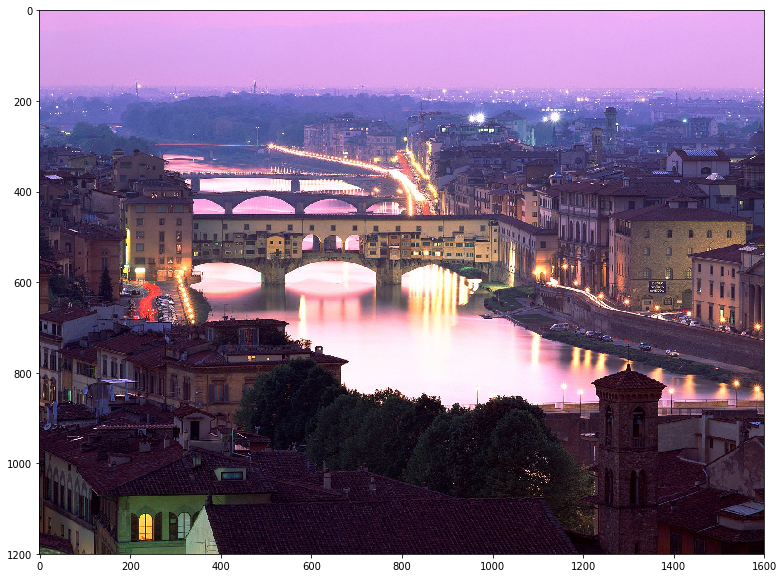

In [2]:
os.chdir('/Users/chalvidalm/Documents/3A OMA/Large scale Optimisation')
Florence = plt.imread('florence.jpg')
plt.figure(figsize=(15,10))
plt.imshow(Florence)

# Adding noise to the image (µ=0, sigma=30) + normalisation

In [3]:
noise = np.random.normal(loc=0, scale=30, size= Florence.shape)
noisy_florence = np.clip(Florence + noise, 0, 255).astype(int)/256
Florence_norm = Florence/256

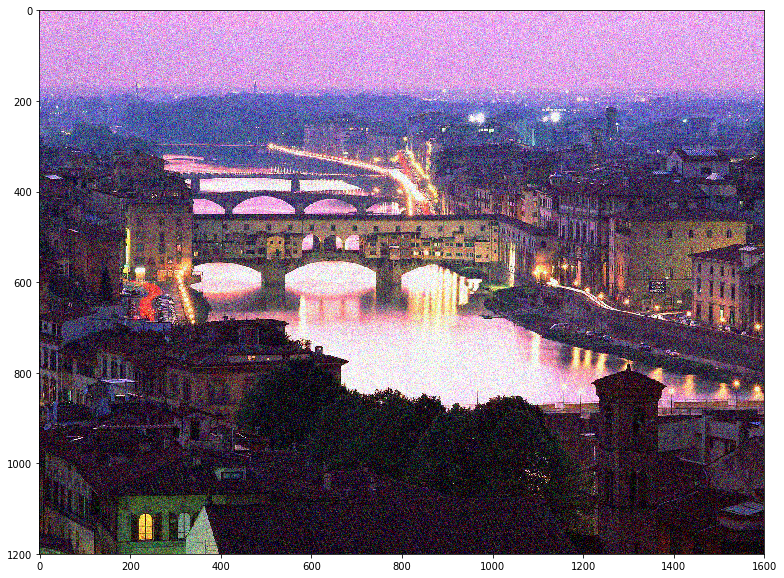

In [4]:
plt.figure(figsize=(15,10))
plt.imshow(noisy_florence)

# Defining reconstruction function 

### The function takes the wavelet form, the regularization parameter,  the norm used and the level of decomposition as parameters

In [5]:
def get_optimum(image, ondelettes='db8', level=2, regularization=1000, q=1):
    coeffs = pywt.wavedec2(image, ondelettes, mode='symmetric', level=level, axes=(0,1))
    coeffs_reg = [coeffs[0]]
    if q == 1:
        for i in range(level):
            wave_prox = np.array([np.sign(coeffs[i+1][j])*np.clip(np.abs(coeffs[i+1][j])
            - regularization*np.ones(coeffs[i+1][j].shape),0,1) for j in [0,1,2]])
            coeffs_reg.append(wave_prox)
    elif q == 4/3:
        for i in range(level):
            coeffs_ = np.asarray(coeffs[i+1])
            epsilon = np.sqrt((coeffs_**2 + (256/729)*regularization**3*np.ones(coeffs_.shape)))
            wave_prox = coeffs_ + 4*3*2**(-1/3)*((epsilon-coeffs_)**(1/3) - (epsilon+coeffs_)**(1/3))
            coeffs_reg.append(wave_prox)
    elif q == 3/2:
        for i in range(level):
            coeffs_ = np.asarray(coeffs[i+1])
            wave_prox = coeffs_ + 9/8*regularization**2*np.sign(coeffs_)*(np.ones(coeffs_.shape) - np.sqrt((np.ones(coeffs_.shape) + 16/(9*regularization**2)*np.abs(coeffs_))))
            coeffs_reg.append(wave_prox)  
    elif q == 2:
        for i in range(level):
            coeffs_ = np.asarray(coeffs[i+1])
            wave_prox = coeffs_/(1+2*regularization)
            coeffs_reg.append(wave_prox)
    elif q == 3:
        for i in range(level):
            coeffs_ = np.asarray(coeffs[i+1])
            wave_prox = np.sign(coeffs_)*(np.sqrt(1+12*regularization*np.abs(coeffs_))-np.ones(coeffs_.shape))/6*regularization
            coeffs_reg.append(wave_prox)  
    elif q == 4:
        for i in range(level):
            coeffs_ = np.asarray(coeffs[i+1])
            epsilon = np.sqrt(coeffs_**2 + (1/27*regularization))
            wave_prox = ((epsilon+coeffs_)/(8*regularization))**(1/3) - ((epsilon-coeffs_)/(8*regularization))**(1/3)
            coeffs_reg.append(wave_prox)  
    image_reg = pywt.waverec2(coeffs_reg, ondelettes, axes=(0,1))
    return image_reg   

# Results for different norms

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0.0, 1.0, 0.0, 1.0)

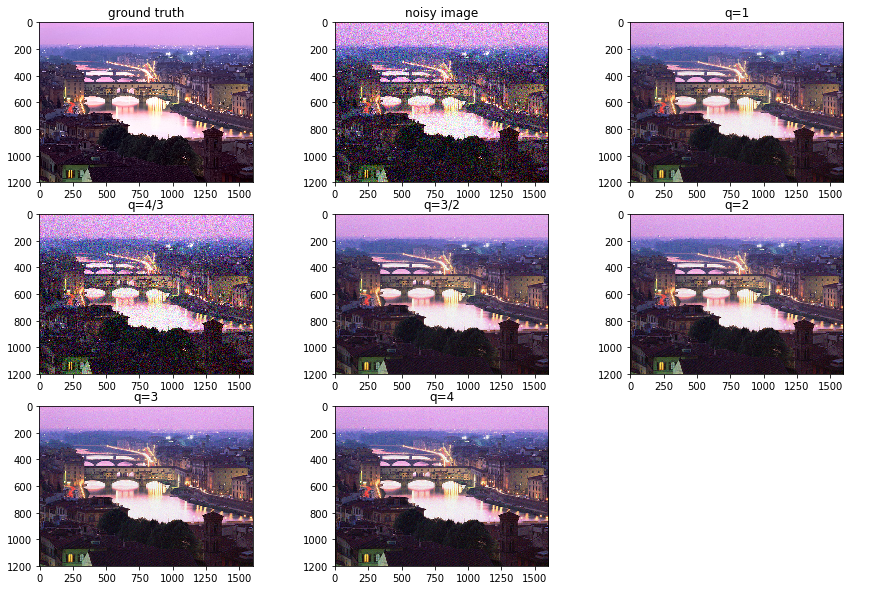

In [598]:
fig ,a = plt.subplots(3,3, figsize=(15,10))


florence_reg_1_1000 = get_optimum(noisy_florence, ondelettes='db8', level=2, regularization=1000, q=1)
florence_reg_4_3_1000 = get_optimum(noisy_florence, ondelettes='db8', level=2, regularization=1000, q=4/3)
florence_reg_3_2_1000 = get_optimum(noisy_florence, ondelettes='db8', level=2, regularization=1000, q=3/2)
florence_reg_2_1000 = get_optimum(noisy_florence, ondelettes='db8', level=2, regularization=1000, q=2)
florence_reg_3_1000 = get_optimum(noisy_florence, ondelettes='db8', level=2, regularization=0.001, q=3)
florence_reg_4_1000 = get_optimum(noisy_florence, ondelettes='db8', level=2, regularization=1000, q=4)


a[0,0].set_title('ground truth')
a[0,0].imshow(Florence)

a[0,1].set_title('noisy image')
a[0,1].imshow(noisy_florence)

a[0,2].set_title('q=1')
a[0,2].imshow(florence_reg_1_1000)

a[1,0].set_title('q=4/3')
a[1,0].imshow(florence_reg_4_3_1000)

a[1,1].set_title('q=3/2')
a[1,1].imshow(florence_reg_3_2_1000)

a[1,2].set_title('q=2')
a[1,2].imshow(florence_reg_2_1000)

a[2,0].set_title('q=3')
a[2,0].imshow(florence_reg_3_1000)

a[2,1].set_title('q=4')
a[2,1].imshow(florence_reg_4_1000)

a[2,2].axis('off')


# Comparing different wavelets 

In [17]:
florence_db4 = get_optimum(noisy_florence, ondelettes='db4', level=2, regularization=0.1, q=3)
florence_db16 = get_optimum(noisy_florence, ondelettes='db16', level=2, regularization=0.1, q=3)
florence_haar = get_optimum(noisy_florence, ondelettes='haar', level=2, regularization=0.1, q=3)
florence_sym = get_optimum(noisy_florence, ondelettes='sym8', level=2, regularization=0.1, q=3)
florence_sym16 = get_optimum(noisy_florence, ondelettes='sym16', level=2, regularization=0.1, q=3)
florence_coif = get_optimum(noisy_florence, ondelettes='coif8', level=2, regularization=0.1, q=3)
florence_coif16 = get_optimum(noisy_florence, ondelettes='coif16', level=2, regularization=0.1, q=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


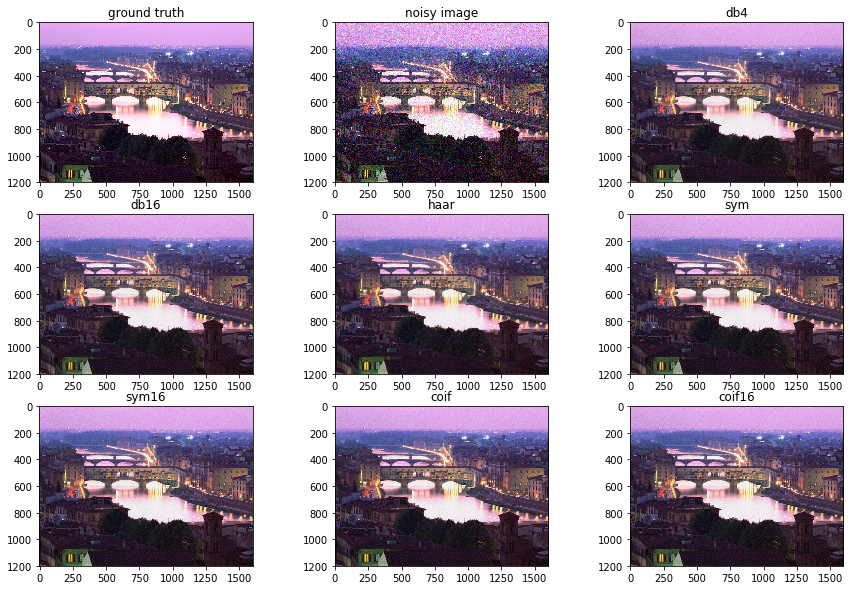

In [18]:
fig ,a = plt.subplots(3,3, figsize=(15,10))

a[0,0].set_title('ground truth')
a[0,0].imshow(Florence)

a[0,1].set_title('noisy image')
a[0,1].imshow(noisy_florence)

a[0,2].set_title('db4')
a[0,2].imshow(florence_db4)

a[1,0].set_title('db16')
a[1,0].imshow(florence_db16)

a[1,1].set_title('haar')
a[1,1].imshow(florence_haar)

a[1,2].set_title('sym')
a[1,2].imshow(florence_sym)

a[2,0].set_title('sym16')
a[2,0].imshow(florence_sym16)

a[2,1].set_title('coif')
a[2,1].imshow(florence_coif)

a[2,2].set_title('coif16')
a[2,2].imshow(florence_coif16)

[7.086198602492019e-05, 7.020325741519713e-05, 7.69491221503256e-05, 7.03976445548423e-05, 7.021460060050134e-05, 7.02301645085497e-05, 7.015605651208873e-05]


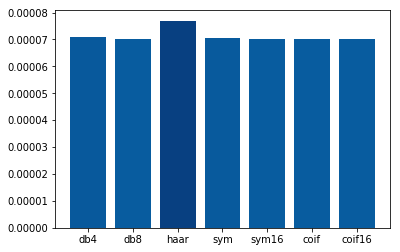

In [31]:
from matplotlib import cm
wavelets_tests = [florence_db4,florence_db16,florence_haar,florence_sym,florence_sym16,florence_coif,florence_coif16]
wavelets_errors = [np.linalg.norm(Florence_norm - i)/(1200*1600) for i in wavelets_tests]
fig, a = plt.subplots(1)
a.bar(['db4','db8','haar','sym','sym16','coif','coif16'],wavelets_errors, color=cm.GnBu(wavelets_errors/np.max(wavelets_errors)))
print(wavelets_errors)

**Conclusion** : There is not much gain in reconstruction in using wavelets differents than daubechie's althought symlets and coiflets (which are variations of daubechies wavelets) offer a marginal mean quadratic error gain. Moreover, it seems that selecting daubechies wavelets with a higher number of vanishing moments helps decrease the reconstruction quadratic error.

# Regularization tuning

In [7]:
Regularisations = [10**i for i in range(-5,5)]
norms = [1,4/3,3/2,2,3,4]
Regularisation_quadratic_error = dict(zip(norms,[[] for l in norms]))
for l in [1,4/3,3/2,2,3,4]:
    for k in Regularisations:
        florence_reg = get_optimum(noisy_florence, ondelettes='db8', level=2, regularization=k, q=l)
        Regularisation_quadratic_error[l].append(np.linalg.norm(Florence_norm-florence_reg)/(1200*1600)) 

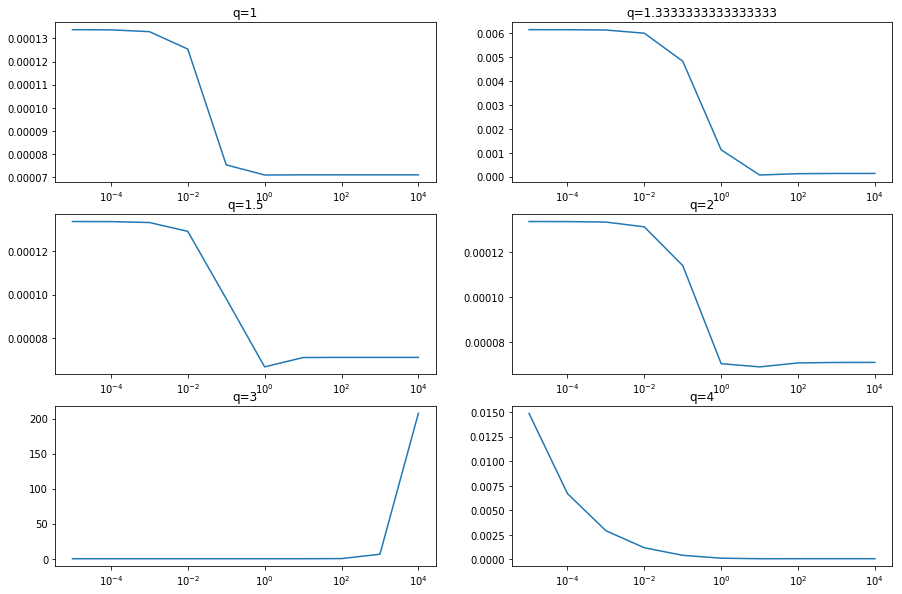

In [8]:
fig ,a = plt.subplots(3,2, figsize=(15,10))
for i,l in enumerate(norms): 
    a[i//2,i%2].semilogx(Regularisations,Regularisation_quadratic_error[l])
    a[i//2,i%2].set_title('q={}'.format(l))

In [15]:
Regularisation_quadratic_error[1]

[0.00013378318708610128,
 0.0001337052012766396,
 0.00013292771751216424,
 0.00012539297961260468,
 7.527872877661727e-05,
 7.088272945872288e-05,
 7.096164568873767e-05,
 7.096164568873767e-05,
 7.096164568873767e-05,
 7.096164568873767e-05]

In [16]:
best_reg = np.argmin(np.array(list(Regularisation_quadratic_error.values())), axis=1)
for j, key in enumerate(list(Regularisation_quadratic_error.keys())):
    print('Best regularisation parametrisation for q={} w.r.t quadratic error: {}, '.format(key,Regularisations[best_reg[j]]) 
          + str(Regularisation_quadratic_error[key][best_reg[j]]), '\n')

Best regularisation parametrisation for q=1 w.r.t quadratic error: 1, 7.088272945872288e-05 

Best regularisation parametrisation for q=2 w.r.t quadratic error: 10, 6.896730286993418e-05 

Best regularisation parametrisation for q=3 w.r.t quadratic error: 0.1, 7.053218569876963e-05 

Best regularisation parametrisation for q=1.3333333333333333 w.r.t quadratic error: 10, 6.746992405362409e-05 

Best regularisation parametrisation for q=1.5 w.r.t quadratic error: 1, 6.657874311251851e-05 

Best regularisation parametrisation for q=4 w.r.t quadratic error: 10, 6.718001241777109e-05 



**Conclusion**: It seems that the optimal combination of parameters w.r.t to the mean quadratic error is using the norm q=3/2 with regularization $\chi$ = 1 for the Daubechie wavelet decomposition.

# level of decomposition tuning

In [33]:
florence_2 = get_optimum(noisy_florence, ondelettes='db8', level=2, regularization=1, q=3/2)
florence_3 = get_optimum(noisy_florence, ondelettes='db8', level=3, regularization=1, q=3/2)
florence_4 = get_optimum(noisy_florence, ondelettes='db8', level=4, regularization=1, q=3/2)
florence_5 = get_optimum(noisy_florence, ondelettes='db8', level=5, regularization=1, q=3/2)
florence_6 = get_optimum(noisy_florence, ondelettes='db8', level=6, regularization=1, q=3/2)

[6.657874311251851e-05, 7.122198584462814e-05, 8.145610267558575e-05, 9.207436457644613e-05, 0.00010092208127357045]


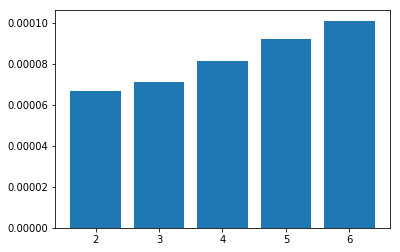

In [35]:
decompositions = [florence_2,florence_3,florence_4,florence_5,florence_6]
errors = [np.linalg.norm(Florence_norm - i)/(1200*1600) for i in decompositions]
fig, a = plt.subplots(1)
a.bar([2,3,4,5,6],errors)
print(errors)

**Conclusion**: There is no point in decomposing the signal further than level=2.

# Vanishing moments tuning

[6.672417569931013e-05, 6.657874311251851e-05, 6.658402107058058e-05, 6.657616817015938e-05, 6.666071287734723e-05, 6.67553204742131e-05]


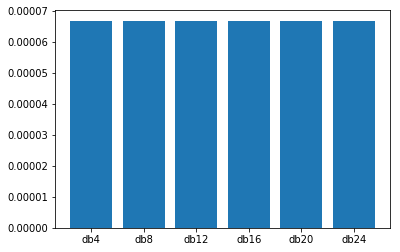

In [37]:
florence_4 = get_optimum(noisy_florence, ondelettes='db4', level=2, regularization=1, q=3/2)
florence_8 = get_optimum(noisy_florence, ondelettes='db8', level=2, regularization=1, q=3/2)
florence_12 = get_optimum(noisy_florence, ondelettes='db12', level=2, regularization=1, q=3/2)
florence_16 = get_optimum(noisy_florence, ondelettes='db16', level=2, regularization=1, q=3/2)
florence_20 = get_optimum(noisy_florence, ondelettes='db20', level=2, regularization=1, q=3/2)
florence_24 = get_optimum(noisy_florence, ondelettes='db24', level=2, regularization=1, q=3/2)

decompositions = [florence_4,florence_8,florence_12,florence_16,florence_20,florence_24]
errors = [np.linalg.norm(Florence_norm - i)/(1200*1600) for i in decompositions]
fig, a = plt.subplots(1)
a.bar(['db4','db8','db12','db16','db20','db24'],errors)
print(errors)

**Conclusion**: The optimal number of vanishing moments w.r.t the mean quadratic error is n=16

# Final comparison with Daubechies wavelets

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


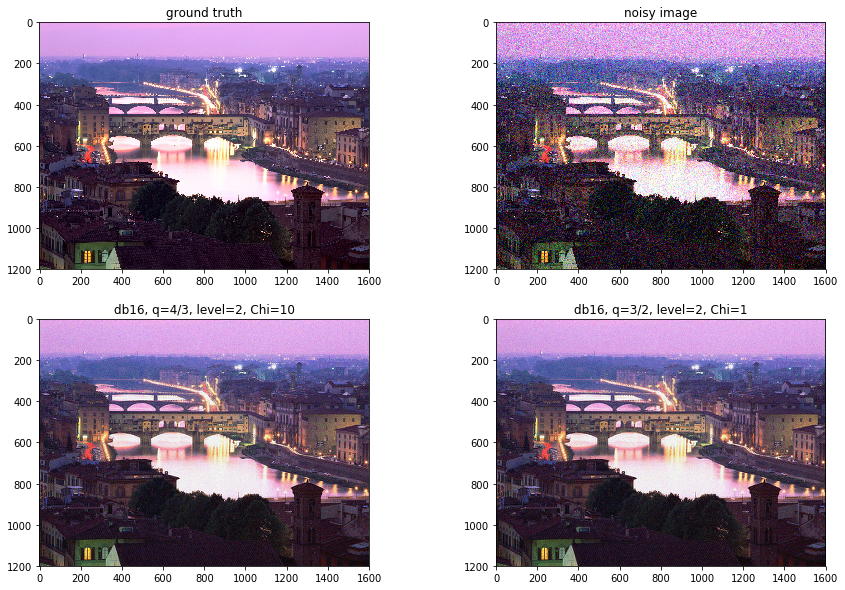

In [39]:
florence_reg_4_3_1000 = get_optimum(noisy_florence, ondelettes='db16', level=2, regularization=10, q=4/3)
florence_reg_3_2_1000 = get_optimum(noisy_florence, ondelettes='db16', level=2, regularization=1, q=1.5)


fig ,a = plt.subplots(2,2, figsize=(15,10))

a[0,0].set_title('ground truth')
a[0,0].imshow(Florence)

a[0,1].set_title('noisy image')
a[0,1].imshow(noisy_florence)

a[1,0].set_title('db16, q=4/3, level=2, Chi=10')
a[1,0].imshow(florence_reg_4_3_1000)

a[1,1].set_title('db16, q=3/2, level=2, Chi=1')
a[1,1].imshow(florence_reg_3_2_1000)
